In [1]:
from ase.build import molecule
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define Rc
# Rc = 

In [3]:
def Fc(Rij,Rc):
    if Rij<= Rc:
        value = 0.5 * (np.cos(np.pi*(Rij/Rc)) +1)
    if Rij> Rc:
        value = 0
    
    return value

In [4]:
def G2(eta,Rij,Rs):
    """ Inputs for G2 in order: eta, Rij,Rs.
    You Have to Determine Rc value before running this function"""
    value=np.exp(-eta*((Rij-Rs)**2)) 
    return value* Fc(Rij,Rc)

In [5]:
def G3(kappa,Rij):
    """ Inputs for G3 in order: kappa,Rij.
    You Have to Determine Rc value before running this function"""
    value = np.cos(kappa * Rij)
    return value * Fc(Rij,Rc)

In [6]:
def G4(zeta,lamda,theta,eta,Rij,Rik,Rjk):
    """ Define zeta, lambda and theta base on G4 eq
    Inputs for G4 in order: zeta,lamda,theta,eta,Rij,Rik,Rjk.
    You Have to Determine Rc value before running this function"""
    t1= (1+lamda * np.cos(np.deg2rad(theta)))**zeta
    t2=np.exp(-eta*(((Rij)**2) +((Rik)**2) + ((Rjk)**2)))
    t3=t1*t2
    t4=Fc(Rij,Rc)*Fc(Rik,Rc)*Fc(Rjk,Rc)
    return t4*t3

In [7]:
def G5(zeta,lamda,theta,eta,Rij,Rik):
    """ Define zeta, lambda and theta base on G5 eq
    Inputs for G5 in order: zeta,lamda,theta,eta,Rij,Rik
    You Have to Determine Rc value before running this function"""
    t1= (1+lamda * np.cos(np.deg2rad(theta)))**zeta
    t2=np.exp(-eta*(((Rij)**2) +((Rik)**2)))
    t3=t1*t2
    t4=Fc(Rij,Rc)*Fc(Rik,Rc)
    return t4*t3

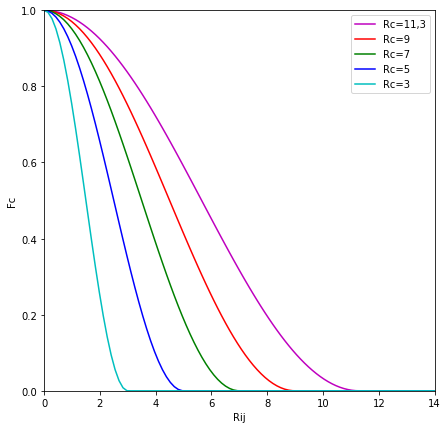

In [8]:
# G1 Plot

# Generate 100 number betwwen 0 and 14
Rij_num = np.linspace(0,14,num=100)

# 5 List created
num11,num9,num7,num5,num3, = ([] for i in range(5))

# Rc Valuse
Rc_values = [11.3,9,7,5,3]

for numbers in Rij_num:
    num11.append(Fc(numbers,Rc_values[0]))
    num9.append(Fc(numbers,Rc_values[1]))
    num7.append(Fc(numbers,Rc_values[2]))
    num5.append(Fc(numbers,Rc_values[3]))
    num3.append(Fc(numbers,Rc_values[4]))
    
# Ploting...
plt.figure(figsize=(7,7))
plt.plot(Rij_num, num11,'m',label='Rc=11,3')
plt.plot(Rij_num, num9, 'r',label='Rc=9',)
plt.plot(Rij_num, num7, 'g',label='Rc=7',)
plt.plot(Rij_num, num5, 'b',label='Rc=5',)
plt.plot(Rij_num, num3, 'c', label='Rc=3',)

plt.legend(loc='best')
plt.xlabel('Rij')
plt.ylabel('Fc')
plt.margins(0)
plt.show()

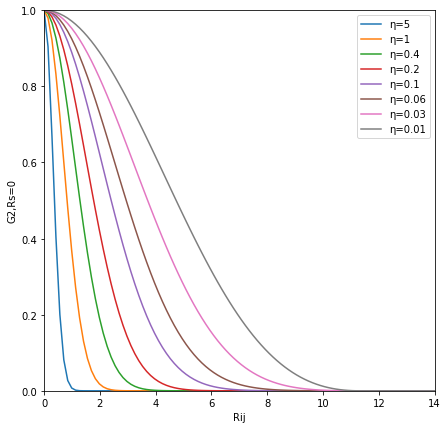

In [9]:
# G2 Plot

Rij_num = np.linspace(0,14,num=100)
Rc = 11.3
eta_values = [5,1, 4e-1, 2e-1, 1e-1, 6e-2, 3e-2, 1e-2]
Rs= 0

G2e_5, G2e_1, G2e_04, G2e_02, G2e_01, G2e_006, G2e_003, G2e_001 = ([] for i in range(8))

for numbers in Rij_num:
    G2e_5.append(G2(eta_values[0],numbers,Rs))
    G2e_1.append(G2(eta_values[1],numbers,Rs))
    G2e_04.append(G2(eta_values[2],numbers,Rs))
    G2e_02.append(G2(eta_values[3],numbers,Rs))
    G2e_01.append(G2(eta_values[4],numbers,Rs))
    G2e_006.append(G2(eta_values[5],numbers,Rs))
    G2e_003.append(G2(eta_values[6],numbers,Rs))
    G2e_001.append(G2(eta_values[7],numbers,Rs))

plt.figure(figsize=(7,7))
plt.plot(Rij_num, G2e_5, label='\u03B7=5')
plt.plot(Rij_num, G2e_1, label='\u03B7=1')
plt.plot(Rij_num, G2e_04, label='\u03B7=0.4')
plt.plot(Rij_num, G2e_02, label='\u03B7=0.2')
plt.plot(Rij_num, G2e_01, label='\u03B7=0.1')
plt.plot(Rij_num, G2e_006, label='\u03B7=0.06')
plt.plot(Rij_num, G2e_003, label='\u03B7=0.03')
plt.plot(Rij_num, G2e_001, label='\u03B7=0.01')


plt.legend(loc='best')
plt.xlabel('Rij')
plt.ylabel('G2,Rs=0')
plt.margins(0)
plt.show()

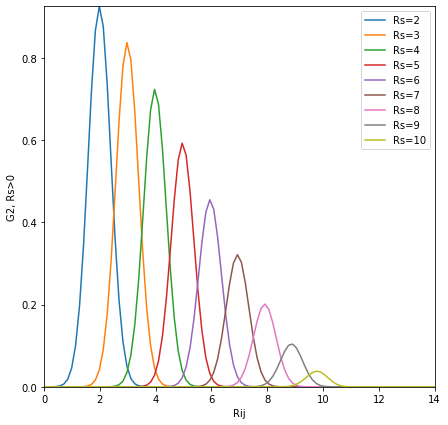

In [10]:
# G2 Plot

Rij_num = np.linspace(0,14,num=100)
Rc = 11.3
eta = 3
G2_10, G2_9, G2_8, G2_7, G2_6, G2_5, G2_4, G2_3, G2_2 = ([] for i in range(9))
Rs=[10,9,8,7,6,5,4,3,2]

for numbers in Rij_num:
    G2_10.append(G2(eta,numbers,Rs[0]))
    G2_9.append(G2(eta,numbers,Rs[1]))
    G2_8.append(G2(eta,numbers,Rs[2]))
    G2_7.append(G2(eta,numbers,Rs[3]))
    G2_6.append(G2(eta,numbers,Rs[4]))
    G2_5.append(G2(eta,numbers,Rs[5]))
    G2_4.append(G2(eta,numbers,Rs[6]))
    G2_3.append(G2(eta,numbers,Rs[7]))
    G2_2.append(G2(eta,numbers,Rs[8]))
    
    
    
plt.figure(figsize=(7,7))
plt.plot(Rij_num, G2_2, label='Rs=2')
plt.plot(Rij_num, G2_3, label='Rs=3')
plt.plot(Rij_num, G2_4, label='Rs=4')
plt.plot(Rij_num, G2_5, label='Rs=5')
plt.plot(Rij_num, G2_6, label='Rs=6')
plt.plot(Rij_num, G2_7, label='Rs=7')
plt.plot(Rij_num, G2_8, label='Rs=8')
plt.plot(Rij_num, G2_9, label='Rs=9')
plt.plot(Rij_num, G2_10, label='Rs=10')

plt.legend(loc='best')
plt.xlabel('Rij')
plt.ylabel('G2, Rs>0')
plt.margins(0)
plt.show()

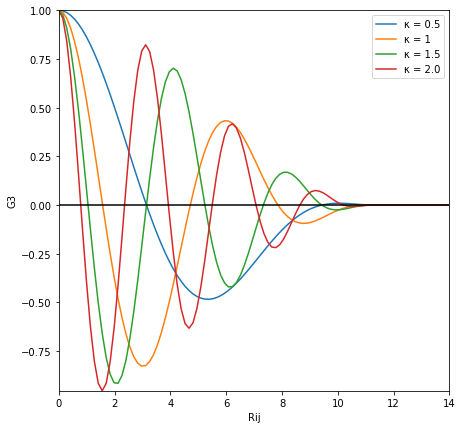

In [60]:
# G3 Plot
Rij_num = np.linspace(0,14,num=100)
kappa_list = [0.5,1,1.5,2]
Rc = 11.3


G3_05, G3_1, G3_15, G3_2 = ([] for i in range(4))

for numbers in Rij_num:
    G3_05.append(G3(kappa_list[0],numbers))
    G3_1.append(G3(kappa_list[1],numbers))
    G3_15.append(G3(kappa_list[2],numbers))
    G3_2.append(G3(kappa_list[3],numbers))
    
plt.figure(figsize=(7,7))
plt.plot(Rij_num, G3_05, label='\u03BA = 0.5')
plt.plot(Rij_num, G3_1, label='\u03BA = 1')
plt.plot(Rij_num, G3_15, label='\u03BA = 1.5')
plt.plot(Rij_num, G3_2, label='\u03BA = 2.0')
# Y=0 line
plt.plot(Rij_num,np.linspace(0,0,100),'k')


plt.legend(loc='best')
plt.xlabel('Rij')
plt.ylabel('G3')
plt.margins(0)
plt.show()

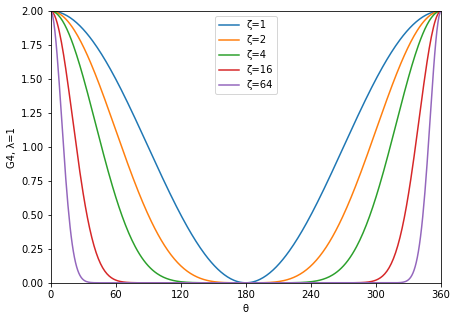

In [12]:
G4_new_1, G4_new_2, G4_new_4, G4_new_16, G4_new_64 = ([] for i in range(5))

zeta = [1,2,4,16,64]
lamda = [1,1,1,1,1]
teta = range(0,361,1)
eta= [1,1,1,1,1]
Rij,Rik,Rjk = [0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]
Rc = 10


for numbers in teta:
    G4_new_1.append(G4(zeta[0],lamda[0],numbers,eta[0],Rij[0],Rik[0],Rjk[0]) * (2**(1-zeta[0])) )
    G4_new_2.append(G4(zeta[1],lamda[1],numbers,eta[1],Rij[1],Rik[1],Rjk[1]) * (2**(1-zeta[1])) )
    G4_new_4.append(G4(zeta[2],lamda[2],numbers,eta[2],Rij[2],Rik[2],Rjk[2]) * (2**(1-zeta[2])) )
    G4_new_16.append(G4(zeta[3],lamda[3],numbers,eta[3],Rij[3],Rik[3],Rjk[3]) * (2**(1-zeta[3])) )
    G4_new_64.append(G4(zeta[4],lamda[4],numbers,eta[4],Rij[4],Rik[4],Rjk[4]) * (2**(1-zeta[4])) )


plt.figure(figsize=(7,5))
plt.plot(teta,G4_new_1, label='\u03B6=1')
plt.plot(teta,G4_new_2, label='\u03B6=2')
plt.plot(teta,G4_new_4, label='\u03B6=4')
plt.plot(teta,G4_new_16, label='\u03B6=16')
plt.plot(teta,G4_new_64, label='\u03B6=64')

plt.legend(loc='best')
plt.xlabel('\u03B8')
plt.ylabel('G4, \u03BB=1')
plt.margins(0)
plt.xticks(range(0,361,60))
plt.show()

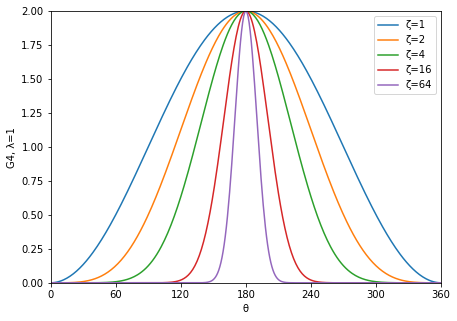

In [13]:
G4_new_1, G4_new_2, G4_new_4, G4_new_16, G4_new_64 = ([] for i in range(5))

zeta = [1,2,4,16,64]
lamda = [-1,-1,-1,-1,-1]
teta = range(0,361,1)
eta= [1,1,1,1,1]
Rij,Rik,Rjk = [0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]
Rc = 10


for numbers in teta:
    G4_new_1.append(G4(zeta[0],lamda[0],numbers,eta[0],Rij[0],Rik[0],Rjk[0]) * (2**(1-zeta[0])) )
    G4_new_2.append(G4(zeta[1],lamda[1],numbers,eta[1],Rij[1],Rik[1],Rjk[1]) * (2**(1-zeta[1])) )
    G4_new_4.append(G4(zeta[2],lamda[2],numbers,eta[2],Rij[2],Rik[2],Rjk[2]) * (2**(1-zeta[2])) )
    G4_new_16.append(G4(zeta[3],lamda[3],numbers,eta[3],Rij[3],Rik[3],Rjk[3]) * (2**(1-zeta[3])) )
    G4_new_64.append(G4(zeta[4],lamda[4],numbers,eta[4],Rij[4],Rik[4],Rjk[4]) * (2**(1-zeta[4])) )


plt.figure(figsize=(7,5))
plt.plot(teta,G4_new_1, label='\u03B6=1')
plt.plot(teta,G4_new_2, label='\u03B6=2')
plt.plot(teta,G4_new_4, label='\u03B6=4')
plt.plot(teta,G4_new_16, label='\u03B6=16')
plt.plot(teta,G4_new_64, label='\u03B6=64')

plt.legend(loc='best')
plt.xlabel('\u03B8')
plt.ylabel('G4, \u03BB=1')
plt.margins(0)
plt.xticks(range(0,361,60))
plt.show()

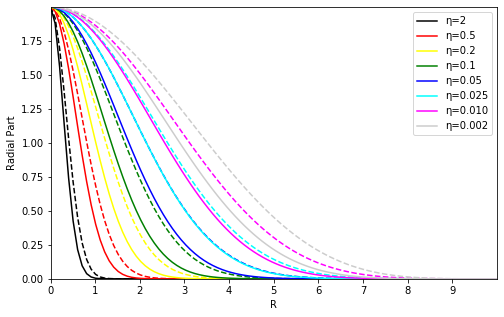

In [57]:
Rij_num = np.linspace(0,10,num=100)
zeta=[1,1,1,1,1,1,1,1]
lamda=[1,1,1,1,1,1,1,1]
theta=[1,1,1,1,1,1,1,1]
eta = [2, 0.5, 0.2, 0.1, 0.05, 0.025, 0.01, 0.002]
G5_2, G5_05, G5_02, G5_01, G5_005, G5_0025, G5_001, G5_0002 = ([] for i in range(8))
G4_2, G4_05, G4_02, G4_01, G4_005, G4_0025, G4_001, G4_0002 = ([] for i in range(8))

for R in Rij_num:
    G5_2.append(G5(zeta[0],lamda[0],theta[0],eta[0],R,R))
    G5_05.append(G5(zeta[1],lamda[1],theta[1],eta[1],R,R))
    G5_02.append(G5(zeta[2],lamda[2],theta[2],eta[2],R,R))
    G5_01.append(G5(zeta[3],lamda[3],theta[3],eta[3],R,R))
    G5_005.append(G5(zeta[4],lamda[4],theta[4],eta[4],R,R))
    G5_0025.append(G5(zeta[5],lamda[5],theta[5],eta[5],R,R))
    G5_001.append(G5(zeta[6],lamda[6],theta[6],eta[6],R,R))
    G5_0002.append(G5(zeta[7],lamda[7],theta[7],eta[7],R,R))
    
    
for R in Rij_num:
    G4_2.append(G4(zeta[0],lamda[0],theta[0],eta[0],R,R,R))
    G4_05.append(G4(zeta[1],lamda[1],theta[1],eta[1],R,R,R))
    G4_02.append(G4(zeta[2],lamda[2],theta[2],eta[2],R,R,R))
    G4_01.append(G4(zeta[3],lamda[3],theta[3],eta[3],R,R,R))
    G4_005.append(G4(zeta[4],lamda[4],theta[4],eta[4],R,R,R))
    G4_0025.append(G4(zeta[5],lamda[5],theta[5],eta[5],R,R,R))
    G4_001.append(G4(zeta[6],lamda[6],theta[6],eta[6],R,R,R))
    G4_0002.append(G4(zeta[7],lamda[7],theta[7],eta[7],R,R,R))
    
plt.figure(figsize=(8,5))
plt.plot(Rij_num,G5_2,  color='black',linestyle='dashed')
plt.plot(Rij_num,G5_05, color='red',linestyle='dashed')
plt.plot(Rij_num,G5_02, color='yellow',linestyle='dashed')
plt.plot(Rij_num,G5_01, color='green',linestyle='dashed')
plt.plot(Rij_num,G5_005, color='blue',linestyle='dashed')
plt.plot(Rij_num,G5_0025,color='cyan',linestyle='dashed')
plt.plot(Rij_num,G5_001, color='magenta',linestyle='dashed')
plt.plot(Rij_num,G5_0002,color=('0.8'),linestyle='dashed')
###############
plt.plot(Rij_num,G4_2, color='black', label='\u03B7=2')
plt.plot(Rij_num,G4_05,color='red', label='\u03B7=0.5')
plt.plot(Rij_num,G4_02, color='yellow', label='\u03B7=0.2')
plt.plot(Rij_num,G4_01, color='green',label='\u03B7=0.1')
plt.plot(Rij_num,G4_005, color='blue',label='\u03B7=0.05')
plt.plot(Rij_num,G4_0025, color='cyan',label='\u03B7=0.025')
plt.plot(Rij_num,G4_001, color='magenta',label='\u03B7=0.010')
plt.plot(Rij_num,G4_0002, color=('0.8'),label='\u03B7=0.002')
###########

plt.legend(loc='best')
plt.xlabel('R')
plt.ylabel('Radial Part')
plt.margins(0)
plt.xticks(range(0,10,1))
plt.show()